<a href="https://colab.research.google.com/github/hsuemily/CE888_Hsu-Chi-Rou_1900759/blob/master/Assignment/Dataset1_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library

In [0]:
# Import library
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

## 2.  Load Dataset

In [0]:
# Load data
# Colab library to upload files to notebook, Ref:https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Load data from Kaggle to Google Colab virtual machine
os.environ['KAGGLE_USERNAME'] = "emilyhsucr" # username from the json file
os.environ['KAGGLE_KEY'] = "3b6aa5aa02b468c89e4cfac52a5d992e" # key from the json file
!kaggle competitions download -c porto-seguro-safe-driver-prediction # api copied from kaggle

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# Titanic
Titanic = pd.read_csv("https://raw.githubusercontent.com/hsuemily/CE888_Hsu-Chi-Rou_1900759/master/Assignment/titanic_train.csv", delimiter = ",")


In [0]:
Titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Data Visualization

Class <=50K: 549
Class >50K: 342
Imbalance rate: 61.62 %


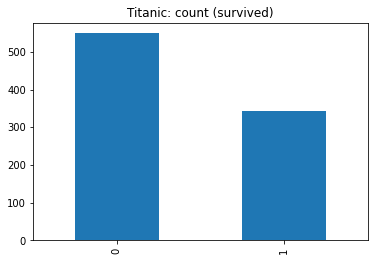

In [0]:
# Plot histogram of the label Survived in Titanic dataset
# Ref: https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python
# Ref: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
pd.Series(Titanic['Survived']).value_counts().plot(kind='bar',title='Titanic: count (survived)')
target_count = Titanic.Survived.value_counts()
print('Class <=50K:', target_count[0])
print('Class >50K:', target_count[1])
print('Imbalance rate:', round((target_count[0] / (target_count[0]+target_count[1]))*100, 2), '%')

## 4. Data Preprocessing
 - 4.1 Missing Value
 - 4.2 Normalization
 - 4.3 Lable encoding or one hot encoding

### 4.1 Missing Value

In [0]:
# dealing with missing value

#*****Titanic
total = Titanic.isnull().sum().sort_values(ascending=False)
# summarize the amount of missing value in each attributes, and then sort it by descending order
# percent = the counts of missing value /the counts of item (in each attribute)
percent = (Titanic.isnull().sum()/Titanic.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

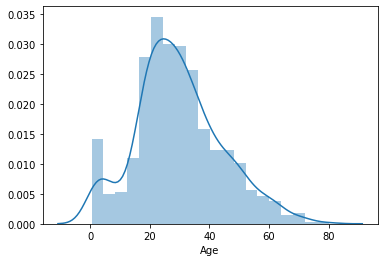

In [0]:
sns.distplot(Titanic['Age'])
Titanic['Age'].describe()

In [0]:
# median
Titanic_copy = Titanic.copy() # copy: copy the original data in order to keep the original data 
Titanic_copy.loc[Titanic_copy['Age'].isnull(),'Age']=Titanic_copy['Age'].mean(skipna=True)

In [0]:
#dealing with missing data
# fill them into none
cols1 = ["Cabin"]
for col in cols1:
    Titanic_copy[col].fillna("None", inplace=True)

In [0]:
# drop the missing value in "Embarked" column
Titanic_copy=Titanic_copy.dropna()

In [0]:
#*****Titanic- check for the missing dataset again
total = Titanic_copy.isnull().sum().sort_values(ascending=False)
percent = (Titanic_copy.isnull().sum()/Titanic_copy.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Embarked,0,0.0
Cabin,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


### 4.2 Normalization

In [0]:
# Normalize dataset - Titanic
for col in Titanic_copy.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    Titanic_copy[col] = mms.fit_transform(Titanic_copy[[col]])
Titanic_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.500000,0.382452,0.655793,0.367347,0.065523,0.063742,0.062649
std,0.288762,0.486260,0.417350,0.162960,0.137963,0.134460,0.097003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250562,0.000000,0.500000,0.271174,0.000000,0.000000,0.015412
50%,0.500000,0.000000,1.000000,0.367921,0.000000,0.000000,0.028213
75%,0.749438,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.3 Lable encoding or one hot encoding

In [0]:
# Using one hot encoding in Titanic and Adult dataset
# Ref: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
Titanic_copy = onehotencoder.fit_transform(Titanic_copy).toarray()

print("Titanic:",Titanic_copy)
print(Titanic_copy.shape)

Titanic: [[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(889, 2965)


## 5. Supervised Learning
### 5.1 Decesion tree (cross-validation)
### 5.2 Random forest (cross-validation)